<a href="https://colab.research.google.com/github/pOsdas/CNN-models-test/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ПОДКЛЮЧЕНИЕ ДИСКА
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# УСТАНОВКА ЗАВИСИМОСТЕЙ
!pip install ultralytics
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install pixellib
!pip install tensorflow

# Индивидуальное сравнение


0: 512x640 13 persons, 1 bicycle, 6 cars, 1 truck, 2 traffic lights, 417.2ms
Speed: 5.6ms preprocess, 417.2ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


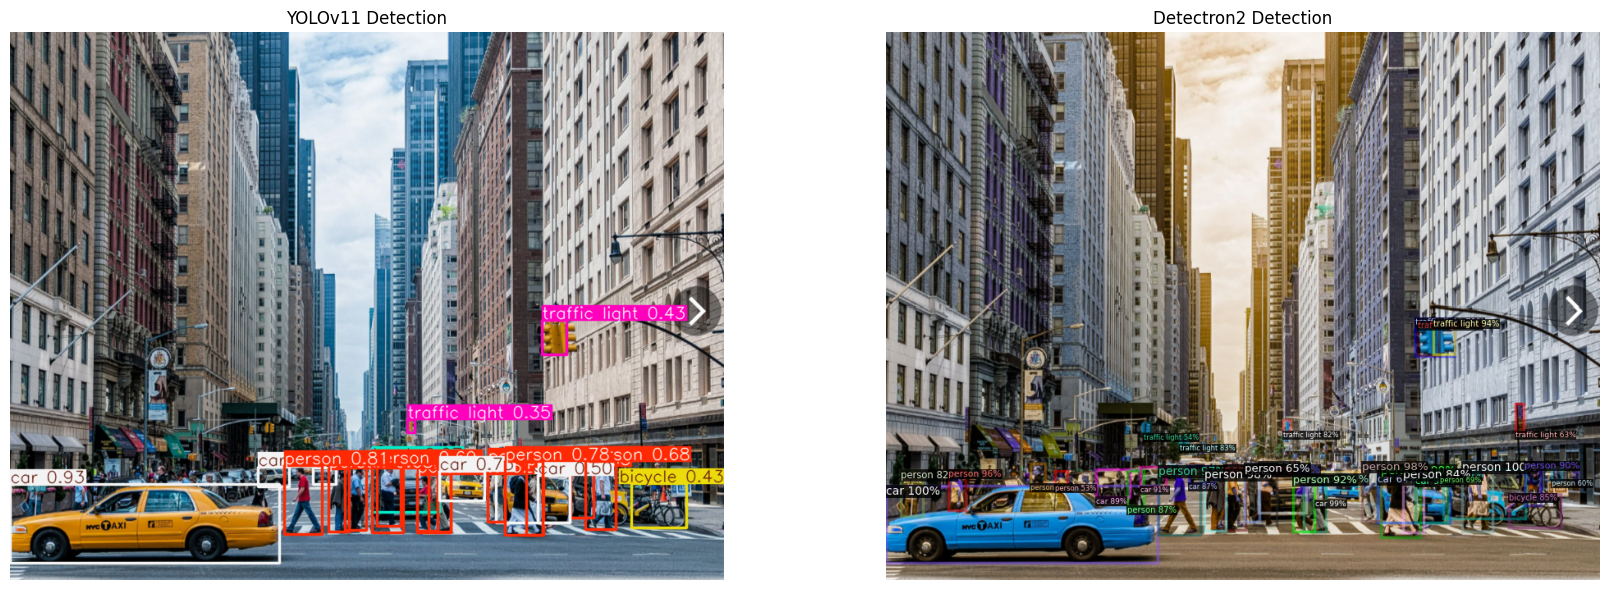

In [3]:
# ======== ИМПОРТЫ ========
import cv2
import matplotlib.pyplot as plt
import numpy as np

from ultralytics import YOLO

import tensorflow as tf
import tensorflow.python.keras.layers as keras_layers_py
setattr(keras_layers_py, "BatchNormalization", tf.keras.layers.BatchNormalization)

import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

import pixellib
from pixellib.semantic import semantic_segmentation

# ======== ЗАГРУЗКА ИЗОБРАЖЕНИЯ ========
# !wget -q https://ultralytics.com/images/bus.jpg -O image.jpg
image = cv2.imread("drive/MyDrive/sample.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ======== YOLOv5 DETECTION ========
yolo = YOLO("drive/MyDrive/yolo11s.pt")
yolo_results = yolo(image_rgb)[0]
img_yolo = yolo_results.plot()

# ======== DETECTRON2 DETECTION ========
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

predictor = DefaultPredictor(cfg)
outputs = predictor(image)
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
img_detectron = v.get_image()[:, :, ::-1]

# ======== ОТОБРАЖЕНИЕ ========
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].imshow(img_yolo)
axes[0].set_title("YOLOv11 Detection")
axes[0].axis("off")

axes[1].imshow(img_detectron)
axes[1].set_title("Detectron2 Detection")
axes[1].axis("off")

plt.tight_layout()
plt.show()


# Сравнение всех моделей


0: 512x640 14 persons, 1 bicycle, 7 cars, 1 traffic light, 200.2ms
Speed: 3.7ms preprocess, 200.2ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 14 persons, 1 bicycle, 7 cars, 1 traffic light, 174.1ms
Speed: 2.4ms preprocess, 174.1ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)


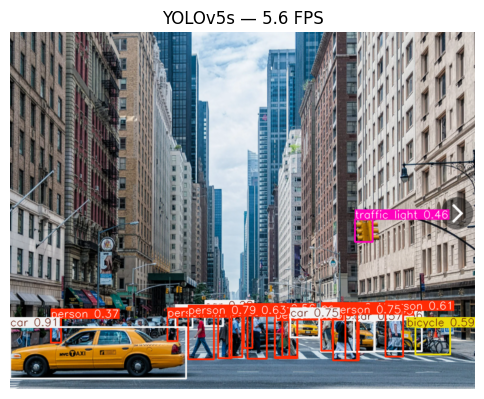


0: 512x640 14 persons, 1 bicycle, 4 cars, 1 truck, 2 traffic lights, 132.2ms
Speed: 56.2ms preprocess, 132.2ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 14 persons, 1 bicycle, 4 cars, 1 truck, 2 traffic lights, 178.0ms
Speed: 2.5ms preprocess, 178.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


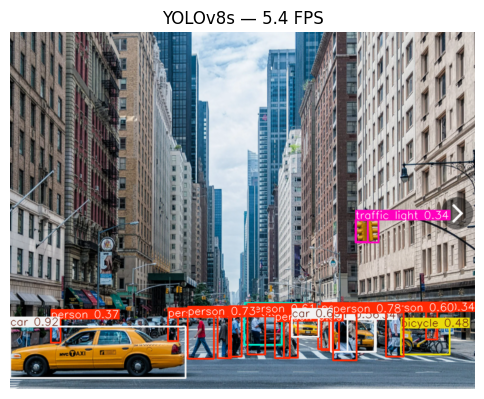


0: 512x640 14 persons, 1 bicycle, 5 cars, 3 traffic lights, 290.9ms
Speed: 2.2ms preprocess, 290.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 14 persons, 1 bicycle, 5 cars, 3 traffic lights, 213.2ms
Speed: 2.4ms preprocess, 213.2ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)


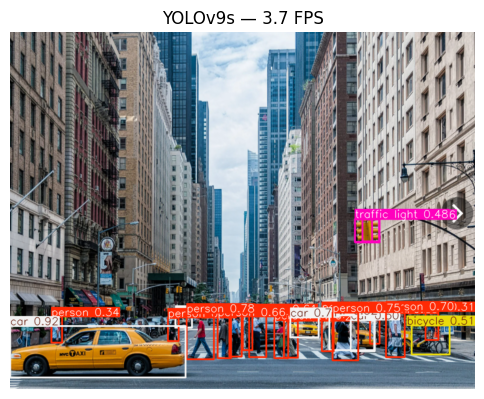


0: 512x640 10 persons, 4 cars, 3 traffic lights, 196.6ms
Speed: 2.7ms preprocess, 196.6ms inference, 0.2ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 10 persons, 4 cars, 3 traffic lights, 126.0ms
Speed: 2.6ms preprocess, 126.0ms inference, 0.2ms postprocess per image at shape (1, 3, 512, 640)


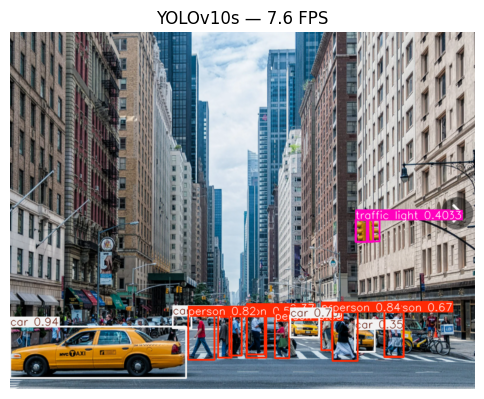


0: 512x640 13 persons, 1 bicycle, 6 cars, 1 truck, 2 traffic lights, 143.3ms
Speed: 53.7ms preprocess, 143.3ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 13 persons, 1 bicycle, 6 cars, 1 truck, 2 traffic lights, 131.7ms
Speed: 53.8ms preprocess, 131.7ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)


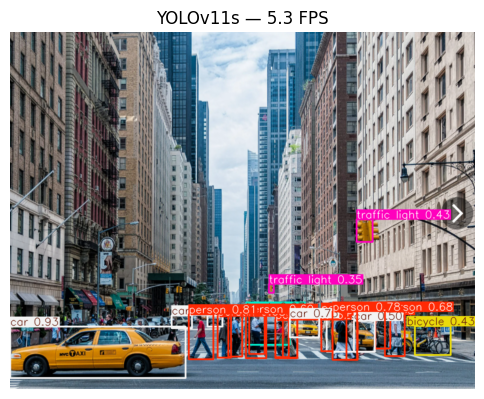

model_final_280758.pkl: 167MB [00:03, 52.8MB/s]                           
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


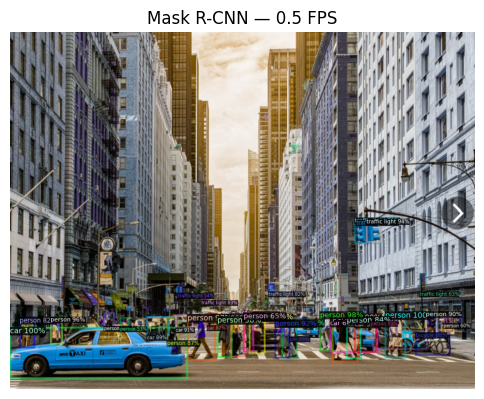

Model      Weights  Inference Time (s)       FPS
0             YOLOv5s  yolov5su.pt            0.179786  5.562177
1             YOLOv8s   yolov8s.pt            0.183816  5.440231
2             YOLOv9s   yolov9s.pt            0.272428  3.670694
3            YOLOv10s  yolov10s.pt            0.130947  7.636699
4            YOLOv11s   yolo11s.pt            0.188702  5.299371
5  Mask R-CNN R50-FPN    model_zoo            2.112210  0.473438

In [ ]:
# ======== УСТАНОВКА ИМПОРТОВ ========
import cv2
import time
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# ======== ЗАГРУЗКА ИЗОБРАЖЕНИЯ ========
img_path = "drive/MyDrive/sample.png"
orig = cv2.imread(img_path)
image_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

# ======== Список моделей YOLOv5–YOLOv11 ========
yolo_versions = {
    "YOLOv5s": "drive/MyDrive/yolov5su.pt",
    # YOLOv6-v7 игнорируем из за плохого api
    "YOLOv8s": "drive/MyDrive/yolov8s.pt",
    "YOLOv9s": "drive/MyDrive/yolov9s.pt",
    "YOLOv10s": "drive/MyDrive/yolov10s.pt",
    "YOLOv11s": "drive/MyDrive/yolo11s.pt"
}

results = []

# ======== Цикл по YOLO-моделям ========
for name, weights in yolo_versions.items():
    try:
        model = YOLO(weights)
    except FileNotFoundError:
        print(f"WARNING: весов для {name} не найдено, пропускаем.")
        continue

    # Тепловое прогревание
    _ = model(image_rgb)

    # Измеряем время
    start = time.time()
    res = model(image_rgb)[0]
    duration = time.time() - start
    fps = 1.0 / duration

    # Визуализация
    img_plot = res.plot()  # numpy array с рамками

    # Покажем детекцию
    plt.figure(figsize=(6,6))
    plt.imshow(img_plot)
    plt.title(f"{name} — {fps:.1f} FPS")
    plt.axis("off")
    plt.show()

    # Сохраняем результаты
    results.append({
        "Model": name,
        "Weights": weights.split("/")[-1],
        "Inference Time (s)": duration,
        "FPS": fps
    })

# ======== Detectron2 для сравнения ========
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
predictor = DefaultPredictor(cfg)

# Прогрев
_ = predictor(orig)

start = time.time()
outputs = predictor(orig)
detectron_time = time.time() - start
detectron_fps = 1.0 / detectron_time

v = Visualizer(orig[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
img_det = v.get_image()[:, :, ::-1]

plt.figure(figsize=(6,6))
plt.imshow(img_det)
plt.title(f"Mask R-CNN — {detectron_fps:.1f} FPS")
plt.axis("off")
plt.show()

results.append({
    "Model": "Mask R-CNN R50-FPN",
    "Weights": "model_zoo",
    "Inference Time (s)": detectron_time,
    "FPS": detectron_fps
})

# ======== Итоговая таблица ========
df = pd.DataFrame(results)
display(df)
